# Lab Mannual : 03 || K-Fold Validation

In [1]:
# import required modules / libraries
import numpy as np
from sklearn import datasets
from sklearn.model_selection import KFold

In [2]:
# synthetic regression dataset
X, y = datasets.make_regression(
n_samples=10, n_features=1, n_informative=1,
noise=0, random_state=0)

In [3]:
# KFold split
kf = KFold(n_splits=4)
for i, (train_index, test_index) in enumerate(kf.split(X)):
 print(f"Fold {i}:")
 print(f" Training dataset index: {train_index}")
 print(f" Test dataset index: {test_index}")

Fold 0:
 Training dataset index: [3 4 5 6 7 8 9]
 Test dataset index: [0 1 2]
Fold 1:
 Training dataset index: [0 1 2 6 7 8 9]
 Test dataset index: [3 4 5]
Fold 2:
 Training dataset index: [0 1 2 3 4 5 8 9]
 Test dataset index: [6 7]
Fold 3:
 Training dataset index: [0 1 2 3 4 5 6 7]
 Test dataset index: [8 9]


In [4]:
kf.get_n_splits(X)

4

### Visualizing K-Fold Cross-Validation Behavior

In [5]:
from sklearn.datasets import make_classification
# define dataset
X, y = make_classification(
n_samples=100, n_features=20, n_informative=15, n_redundant=5)
# prepare the K-Fold cross-validation procedure
n_splits = 10
cv = KFold(n_splits=n_splits)

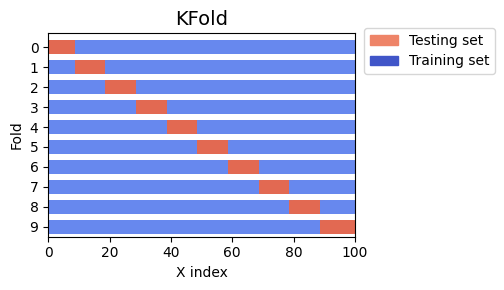

In [8]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import numpy as np


def plot_kfold(cv, X, y, ax, n_splits, xlim_max=100):
    """
    Plots the indices for a cross-validation object.

    Parameters:
    cv : Cross-validation object
    X  : Feature set
    y  : Target variable
    ax : Matplotlib axis object
    n_splits : Number of folds in the cross-validation
    xlim_max : Maximum limit for the x-axis
    """

    # Set color map for the plot
    cmap_cv = plt.cm.coolwarm
    cv_split = cv.split(X=X, y=y)

    for i_split, (train_idx, test_idx) in enumerate(cv_split):
        # Create an array of NaNs and fill in training/testing indices
        indices = np.full(len(X), np.nan)
        indices[test_idx] = 1
        indices[train_idx] = 0

        # Plot the training and testing indices
        ax_x = range(len(indices))
        ax_y = [i_split + 0.5] * len(indices)

        ax.scatter(
            ax_x,
            ax_y,
            c=indices,
            marker="_",
            lw=10,
            cmap=cmap_cv,
            vmin=-0.2,
            vmax=1.2
        )

    # Set y-ticks and labels
    y_ticks = np.arange(n_splits) + 0.5
    ax.set(
        yticks=y_ticks,
        yticklabels=range(n_splits),
        xlabel="X index",
        ylabel="Fold",
        ylim=[n_splits, -0.2],
        xlim=[0, xlim_max]
    )

    # Set plot title
    ax.set_title("KFold", fontsize=14)

    # Create legend
    legend_patches = [
        Patch(color=cmap_cv(0.8), label="Testing set"),
        Patch(color=cmap_cv(0.02), label="Training set")
    ]
    ax.legend(handles=legend_patches, loc=(1.03, 0.8))


# Create figure and axis
fig, ax = plt.subplots(figsize=(6, 3))

plot_kfold(cv, X, y, ax, n_splits)

plt.tight_layout()
fig.subplots_adjust(right=0.6)
plt.show()

##### Cross-Validating Different Regression Models Using K-Fold (California Housing Dataset)

In [9]:
from sklearn.datasets import fetch_california_housing
# fetch california housing data
housing = fetch_california_housing()
print("Dataset Shape:", housing.data.shape, housing.target.shape)
print("Dataset Features:", housing.feature_names)

Dataset Shape: (20640, 8) (20640,)
Dataset Features: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
import numpy as np
X_housing = housing.data
y_housing = housing.target
# Scaling the data
scaler = StandardScaler()
X_scaler = scaler.fit_transform(X_housing)
# K-Fold split
cnt = 0
n_splits = 10
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
for train_index, test_index in kf.split(X_scaler, y_housing):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, \
    Test set:{len(test_index)}')
    cnt += 1


Fold:0, Train set: 18576,     Test set:2064
Fold:1, Train set: 18576,     Test set:2064
Fold:2, Train set: 18576,     Test set:2064
Fold:3, Train set: 18576,     Test set:2064
Fold:4, Train set: 18576,     Test set:2064
Fold:5, Train set: 18576,     Test set:2064
Fold:6, Train set: 18576,     Test set:2064
Fold:7, Train set: 18576,     Test set:2064
Fold:8, Train set: 18576,     Test set:2064
Fold:9, Train set: 18576,     Test set:2064


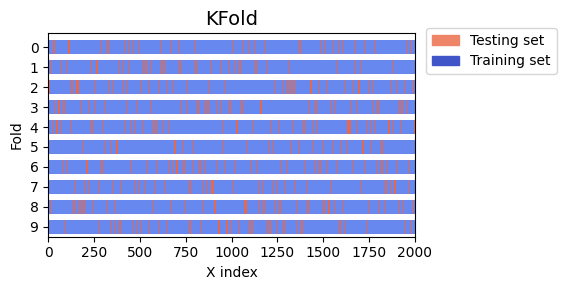

In [11]:
fig, ax = plt.subplots(figsize=(6, 3))
plot_kfold(kf, X_scaler, y_housing, ax, n_splits, xlim_max=2000)
# Make the legend fit
plt.tight_layout()
fig.subplots_adjust(right=0.7)

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import numpy as np


def cross_validation(reg_model, housing_prepared, housing_labels, cv):
    scores = cross_val_score(
        reg_model,
        housing_prepared,
        housing_labels,
        scoring="neg_mean_squared_error",
        cv=cv
    )

    rmse_scores = np.sqrt(-scores)

    print("Scores:", rmse_scores)
    print("Mean:", rmse_scores.mean())
    print("Standard Deviation:", rmse_scores.std())


print("----- Linear Regression Model Cross Validation ------")
lin_reg = LinearRegression()
cross_validation(lin_reg, X_scaler, y_housing, kf)

print("\n----- Decision Tree Regression Model Cross Validation ------")
tree_reg = DecisionTreeRegressor()
cross_validation(tree_reg, X_scaler, y_housing, kf)

print("\n----- Random Forest Regression Model Cross Validation ------")
forest_reg = RandomForestRegressor()
cross_validation(forest_reg, X_scaler, y_housing, kf)

----- Linear Regression Model Cross Validation ------
Scores: [0.74766431 0.74372259 0.6936579  0.75776228 0.69926807 0.72690314
 0.74241379 0.68908607 0.75124511 0.74163695]
Mean: 0.7293360220706322
Standard Deviation: 0.024405508317728385

----- Decision Tree Regression Model Cross Validation ------
Scores: [0.7025366  0.71631899 0.73681054 0.74851409 0.73207262 0.70490726
 0.70815276 0.71444548 0.71327242 0.7333533 ]
Mean: 0.7210384053240514
Standard Deviation: 0.014736702800336851

----- Random Forest Regression Model Cross Validation ------
Scores: [0.50607861 0.49505137 0.47722298 0.52336348 0.48608172 0.51588968
 0.48404544 0.46265053 0.50444052 0.50599479]
Mean: 0.49608191099961446
Standard Deviation: 0.01767471857381347
